In [3]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [4]:
# Set up
import sys

sys.path.append("/home/dchen/BA_CH_EN/")

# Basics
import tensorflow as tf
import xarray as xr
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_preds import *
from src.models.DRN.DRN_load_preds_dummy_10 import *
from src.models.EMOS_local.EMOS_local_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores
from src.models.U_net.u_net_load_score import *
from src.models.U_net.u_net_load_preds import *
from src.features.load_feature_importance import *

<IPython.core.display.Javascript object>

In [6]:
t2m_11_feature_importance = load_feature_importance(2)
ws10_11_feature_importance = load_feature_importance(5)

<IPython.core.display.Javascript object>

In [7]:
t2m_11_feature_importance_mean = [var.mean() for var in t2m_11_feature_importance]
t2m_11_feature_importance_mean.append(0.6009533648913927)
t2m_11_feature_importance_mean.append(0.6186617856448717)

ws10_11_feature_importance_mean = [var.mean() for var in ws10_11_feature_importance]
ws10_11_feature_importance_mean.append(0.008937418460845947)
ws10_11_feature_importance_mean.append(0.0575486421585083)

<IPython.core.display.Javascript object>

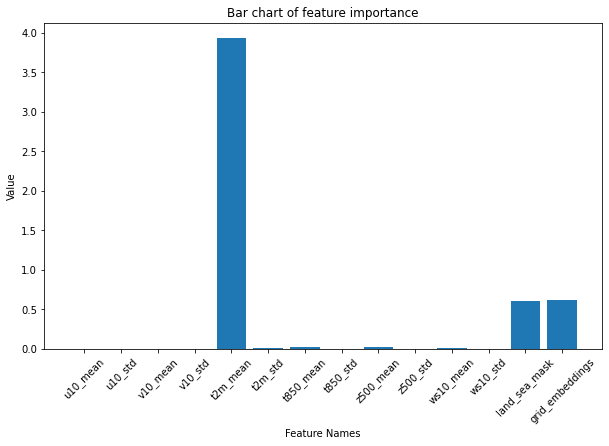

<IPython.core.display.Javascript object>

In [8]:
# Define the bar names
bar_names = [
    "u10_mean",
    "u10_std",
    "v10_mean",
    "v10_std",
    "t2m_mean",
    "t2m_std",
    "t850_mean",
    "t850_std",
    "z500_mean",
    "z500_std",
    "ws10_mean",
    "ws10_std",
    "land_sea_mask",
    "grid_embeddings",
]

# Create the bar chart
plt.figure(
    figsize=(10, 6)
)  # Optional: You can change the figure size to better fit your values
plt.bar(bar_names, t2m_11_feature_importance_mean)

plt.xlabel("Feature Names")  # X-axis label
plt.ylabel("Value")  # Y-axis label
plt.title("Bar chart of feature importance")  # Chart title
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability

# Display the bar chart
plt.show()

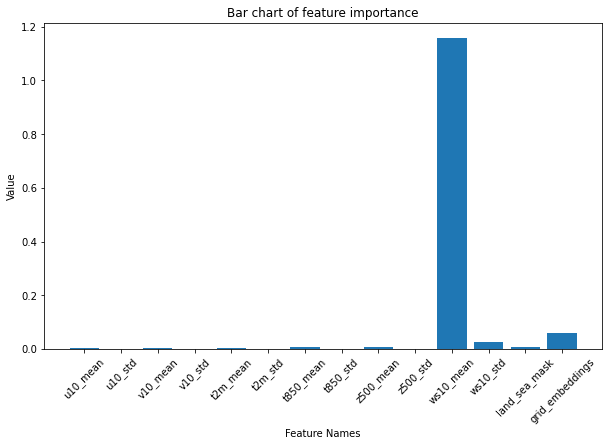

<IPython.core.display.Javascript object>

In [9]:
# Define the bar names
bar_names = [
    "u10_mean",
    "u10_std",
    "v10_mean",
    "v10_std",
    "t2m_mean",
    "t2m_std",
    "t850_mean",
    "t850_std",
    "z500_mean",
    "z500_std",
    "ws10_mean",
    "ws10_std",
    "land_sea_mask",
    "grid_embeddings",
]

# Create the bar chart
plt.figure(
    figsize=(10, 6)
)  # Optional: You can change the figure size to better fit your values
plt.bar(bar_names, ws10_11_feature_importance_mean)

plt.xlabel("Feature Names")  # X-axis label
plt.ylabel("Value")  # Y-axis label
plt.title("Bar chart of feature importance")  # Chart title
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability

# Display the bar chart
plt.show()

In [11]:
def plot_grid_feature_importance(var_num, variable):
    bar_names = [
        "u10_mean",
        "u10_std",
        "v10_mean",
        "v10_std",
        "t2m_mean",
        "t2m_std",
        "t850_mean",
        "t850_std",
        "z500_mean",
        "z500_std",
        "ws10_mean",
        "ws10_std",
        "land_sea_mask",
        "grid_embeddings",
    ]
    t2m_11_feature_importance = load_feature_importance(var_num)

    plt.imshow(t2m_11_feature_importance[variable])
    plt.colorbar()
    plt.title(f"{bar_names[variable]} feature importance")
    plt.show()

<IPython.core.display.Javascript object>

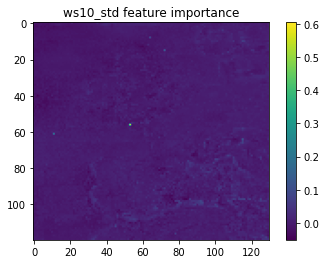

<IPython.core.display.Javascript object>

In [20]:
plot_grid_feature_importance(2, 11)